# Visualization and data analysis of output indicators 

This notebook presents data visualization and analysis for output indicators from the Global indicator project.   
    - Uses 4 sample cities, plots different indicators and compare, interpret the within-city variations and how that may or may not represent the real-world situation

**Note: Refer to the [workflow documentation](https://github.com/gboeing/global-indicators/blob/master/documentation/workflow.md) for indicators tables and description**

In [1]:
import geopandas as gpd
import json
import os
import matplotlib.pyplot as plt
import osmnx as ox

%matplotlib inline

In [2]:
image_path = './images'
dpi = 300

process_folder = '../process'
process_config_path = '../process/configuration/cities.json'

In [3]:
with open(process_config_path) as json_file:
    config = json.load(json_file)

output_folder = os.path.join(process_folder, config['folder'])
input_folder = os.path.join(process_folder, config['input_folder'])

# the path of "global_indicators_hex_250m.gpkg"
gpkgOutput_hex250 = os.path.join(output_folder, config['output_hex_250m'])

# create the path of "global_indicators_city.gpkg"
gpkgOutput_cities = os.path.join(output_folder, config['global_indicators_city'])
        

In [4]:
cities = ['adelaide',
 'auckland',
 'baltimore',
 'bangkok',
 'barcelona',
 'belfast',
 'bern',
 'chennai',
 'mexico_city',
 'cologne',
 'ghent',
 'graz',
 'hanoi',
 'hong_kong',
 'lisbon',
 'melbourne',
 'odense',
 'olomouc',
 'sao_paulo',
 'phoenix',
 'seattle',
 'sydney',
 'valencia',
 'vic']

In [5]:
city_names = {'adelaide' : 'Adelaide',
          'auckland' : 'Auckland',
          'baltimore' : 'Baltimore',
          'bangkok' : 'Bangkok',
          'barcelona' : 'Barcelona',
          'belfast' : 'Belfast',
          'bern' : 'Bern',
          'chennai' : 'Chennai',
          'mexico_city' : 'Mexico City',
          'cologne' : 'Cologne',
          'ghent' : 'Ghent',
          'graz' : 'Graz',
          'hanoi' : 'Hanoi',
          'hong_kong' : 'Hong Kong',
          'lisbon' : 'Lisbon',
          'melbourne' : 'Melbourne',
          'odense' : 'Odense',
          'olomouc' : 'Olomouc',
          'sao_paulo' : 'Sau Paulo',
          'phoenix' : 'Phoenix',
          'seattle' : 'Seattle',
          'sydney' : 'Sydney',
          'valencia' : 'Valencia',
          'vic' : 'Vic'}

In [6]:
cols=['all_cities_walkability', 
          'pct_access_500m_public_open_space_any_binary',
          'pct_access_500m_public_open_space_large_binary',
          'pct_access_500m_pt_gtfs_any_binary',
          'pct_access_500m_pt_gtfs_freq_20_binary',
          'pct_access_500m_pt_gtfs_freq_30_binary']


In [7]:
variable_names={'all_cities_walkability' : 'Within-City Walkability Index', 
                'pct_access_500m_public_open_space_any_binary' : 'Access to Any Public Open Space',
                'pct_access_500m_public_open_space_large_binary' : 'Access to Large Public Open Space',
                'pct_access_500m_pt_gtfs_any_binary' : 'Access to Any Transit',
                'pct_access_500m_pt_gtfs_freq_20_binary' : 'Access to Transit at 20 Minute Frequency',
                'pct_access_500m_pt_gtfs_freq_30_binary' : 'Access to Transit at 30 Minute Frequency'}

In [8]:
for col in cols:
    #city_name = city
    #city_name = 'hong_kong'
    print(variable_names[col])

Within-City Walkability Index
Access to Any Public Open Space
Access to Large Public Open Space
Access to Any Transit
Access to Transit at 20 Minute Frequency
Access to Transit at 30 Minute Frequency


### Plot Example Cities

In [9]:
scheme = 'NaturalBreaks'
k = 5
cmap = 'plasma'
edgecolor = 'none'
city_color = 'none'
city_edge = 'w'
city_edge_lw = 0.2
title_y = 1.02
title_fontsize = 16
title_weight = 'bold'

fontcolor = 'w'
params = {"text.color" : fontcolor,
          "ytick.color" : fontcolor,
          "xtick.color" : fontcolor}
plt.rcParams.update(params)

In [10]:
def plot_within(gpkgOutput_hex250, gpkgOutput_cities, filepath, figsize=(14, 8), facecolor="k", nrows=2, ncols=3, projected=True):

    cols=['all_cities_walkability', 
          'pct_access_500m_public_open_space_any_binary',
          'pct_access_500m_public_open_space_large_binary',
          'pct_access_500m_pt_gtfs_any_binary',
          'pct_access_500m_pt_gtfs_freq_20_binary',
          'pct_access_500m_pt_gtfs_freq_30_binary']

    fig, axes = plt.subplots(figsize=figsize, facecolor=facecolor, nrows=nrows, ncols=ncols,)

    for ax, col in zip(axes.flatten(), cols):
        # the path of "global_indicators_hex_250m.gpkg"
        gpkgOutput_hex250 = os.path.join(output_folder, config['output_hex_250m'])

        # create the path of "global_indicators_city.gpkg"
        gpkgOutput_cities = os.path.join(output_folder, config['global_indicators_city'])
        
        # from filepaths, extract city-level data
        hex250 = gpd.read_file(gpkgOutput_hex250, layer=city)
        city_bound = gpd.read_file(gpkgOutput_cities, layer=city)
        
        # plot hexplot and city boundaries
        _ = hex250.plot(ax=ax, column=col, scheme=scheme, k=k, cmap=cmap, edgecolor=edgecolor,
                        label=city, legend=False, legend_kwds=None)
        _ = city_bound.plot(ax=ax, color=city_color, edgecolor=city_edge, linewidth=city_edge_lw)

        # add titles
        fig.suptitle(f"{city_names[city]} Within-city Indicators", color=fontcolor, fontsize=20, weight='bold')
        ax.set_title(variable_names[col], color=fontcolor, fontsize=10)
        ax.set_axis_off()

        # save to disk
        save_path = os.path.join(image_path, f"{city}-within-maps.png")
        fig.savefig(save_path, dpi=dpi, bbox_inches='tight', facecolor=fig.get_facecolor())
        plt.close()
        
        print(ox.ts(), f'figures saved to disk at "{filepath}"')

    return fig, axes

2020-11-02 08:28:10 begin mapping adelaide


DriverError: ../process/data/output/global_indicators_hex_250m.gpkg: No such file or directory

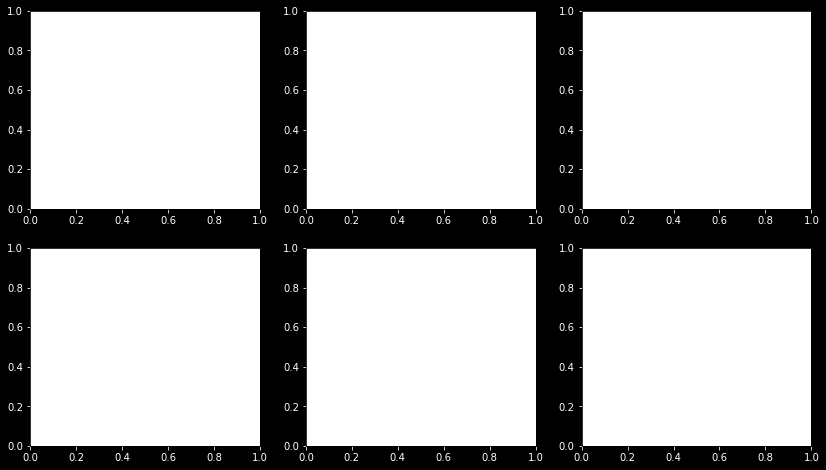

In [11]:
for city in cities:
    print(ox.ts(), f"begin mapping {city}")
    fp = image_path.format(city=city)
    fig, axes = plot_within(gpkgOutput_hex250, gpkgOutput_cities, fp)

print(ox.ts(), f'all done, saved figures"')